# Data Preparation

In [1]:
import seaborn as sns

## Exercise

#### Part 1
* Prepare `bank.csv` with:
    * OrdinalEncoder
    * StandardScaler

#### Part 2
* Train a `KNeighborsClassfier` with `y` being the `'y'` column 

#### Part 3

* Use `df.drop(columns=['y'])` *before* cleaning to get the dataframe without the `y` column

In [40]:
import pandas as pd

loan = pd.read_csv('bank.csv', sep=";")

loan.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [41]:
loan.sample(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
855,46,management,divorced,tertiary,no,624,no,no,cellular,17,sep,336,2,183,2,success,yes


In [5]:
df.isna().sum() # SELECT COUNT(*) FROM df WHERE age,... IS NULL

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
clean = df.dropna()
clean.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [10]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [11]:
df.sample(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
162,0,3,male,26.0,0,0,7.775,S,Third,man,True,NaN,Southampton,no,True


In [13]:
import numpy as np

In [18]:
from sklearn.preprocessing import OrdinalEncoder # Text -> Int 

text_col = clean.select_dtypes(np.object)
oenc = OneHotEncoder().fit(text_col)

In [48]:
from sklearn.preprocessing import OneHotEncoder 
ohot = OneHotEncoder(sparse=False).fit(text_col)
X_oh = ohot.transform(text_col)

In [47]:
from scipy.spatial.distance import euclidean as distance

In [52]:
distance(X_oh[1,0], X_oh[2, 0])

1.0

In [29]:
from sklearn.preprocessing import StandardScaler

num_col = clean.select_dtypes(np.number)
senc = StandardScaler().fit(num_col)
X_num = senc.transform(num_col)

In [30]:
X = np.c_[X_cat, X_num]

In [32]:
y = clean['survived']

In [34]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier().fit(X, y)

model.predict([ X[0, :] ])

array([1], dtype=int64)

In [2]:
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## Exercise

* Take your encoded dataset from the titanic example
    * reducce the number of dimensions (columns) to 4
    * train a KNeighborsClassifer on this new data 
    * EXTRA: plot how much information there is in every column

In [54]:
from sklearn.decomposition import PCA

In [56]:
from sklearn.preprocessing import OneHotEncoder 
ohot = OneHotEncoder(sparse=False).fit(text_col)
X_oh = ohot.transform(text_col)

In [60]:
X = np.c_[ X_oh, X_num ]

In [61]:
X.shape

(182, 19)

In [70]:
pca = PCA(4).fit(X)

In [71]:
X_pca = pca.transform(X)

In [72]:
X_pca.shape

(182, 19)

In [73]:
X_pca[0, :]

array([ 1.07605004e+00, -4.63057378e-01, -1.25699544e+00,  1.96371846e-01,
       -1.00902480e+00,  6.83403309e-01, -9.62591553e-02, -3.90142131e-01,
        5.16479974e-02, -6.97588135e-02, -1.88720456e-02,  6.71928512e-16,
       -2.72283242e-16, -6.11777355e-17,  2.00929321e-17,  2.94098097e-17,
       -1.80792414e-16, -1.50278353e-16, -6.52797250e-17])

In [74]:
X[0, :]

array([ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.69258559, -0.37341964,
        0.15208196,  0.82857574, -0.63415863, -0.10011013])

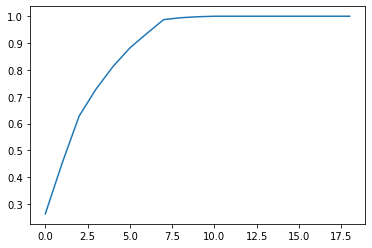

In [78]:
sns.lineplot(np.arange(0, 19), np.cumsum(pca.explained_variance_ratio_))